<a href="https://colab.research.google.com/github/fvillena/patrones/blob/main/4-mlp_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación: Multilayer Perceptron y Support Vector Machines

En aprendizaje de máquinas, la clasificación es el problema de identificar a qué clase (de un grupo finito de clases) una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus clases correspondientes.

In [1]:
import pandas as pd
import sklearn.linear_model # Algoritmos lineales como el Perceptron
import sklearn.neural_network # Perceptón multicapa
import sklearn.model_selection # Funciones para preprocesar nuestros datos
import sklearn.svm
import sklearn.metrics # Métricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
simplest = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/simplest.csv")

In [4]:
simplest.head() # Importamos nuestros datos etiquetados (columna y)

,x1,x2,y
0,1.812018,1.033985,1
1,-2.627158,-2.016127,0
2,-3.023353,1.481023,1
3,2.800382,-2.410295,0
4,-1.836262,2.381069,1


Verificamos la distribución que tienen nuestros datos

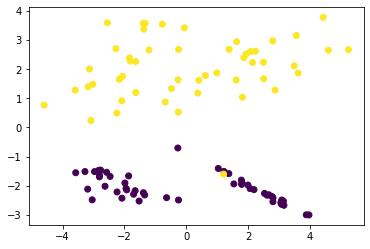

In [6]:
plt.scatter(
    simplest.x1,
    simplest.x2,
    c = simplest.y # Pintamos nuestros puntos según la etiqueta que tengan
)

## Preprocesamiento

Para poder evaluar los desempeños de nuestros modelos de la manera más válida posible, se suele dividir nuestro conjunto de datos un en subconjunto de entrenamiento y uno de prueba. El subconjunto de entrenamiento es el único que utilizaremos para entrenar nuestro modelo. El subconjunto de prueba es independiente al de entrenamiento y con este evaluamos las métricas de desempeño de nuestro modelo.

Para fácilemente realizar esta separación utilizamos la función `sklearn.model_selection.train_test_split()`

In [7]:
simplest_features = simplest.iloc[:,:-1] # Seleccionamos sólo las características de nuestro conjunto de datos

In [8]:
simplest_label = simplest.y# Seleccionamos sólo la etiqueta de nuestro conjunto de datos

In [9]:
# Dividimos nuestro conjunto de datos en subconjuntos de entrenamiento y prueba

simplest_features_train, simplest_features_test, simplest_label_train, simplest_label_test = sklearn.model_selection.train_test_split(
    simplest_features,
    simplest_label,
    test_size=0.33, # Tamaño del conjunto de prueba
    random_state=11 # Bloqueamos el generador de números al azar con una semilla
)

## Perceptrón

Ajustaremos un único perceptrón para poder separar las clases de nuestros datos.

In [10]:
p = sklearn.linear_model.Perceptron() # Instanciamos nuestro perceptrón
p.fit(
    simplest_features_train,
    simplest_label_train
) # Ajustamos el perceptrón con los datos de entrenamiento

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Para evaluar el rendimiento de nuestro clasificador, calcularemos algunas métricas de clasificación sobre el subconjunto de entrenamiento utilizando la función `sklearn.metrics.classification_report()`

In [12]:
print(sklearn.metrics.classification_report(
    simplest_label_test, # Etiquetas reales del conjunto de prueba
    p.predict(simplest_features_test) # Etiquetas predichas por el modelo
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Exploremos los parámetros ajustados de nuestro perceptrón

In [13]:
p.coef_ # Los pesos asociados a cada una de las variables

array([[1.10152364, 6.66922198]])

In [14]:
p.intercept_ # El sesgo asociado al perceptrón

array([4.])

En este artículo pueden aprender como encontrar la pendiente y el intercepto asociados a nuestro perceptrón. https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron

In [15]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] ) # Pendiente asociada al umbral de clasificación
intercept = -p.intercept_ / p.coef_[0][1] # Intercepto asociado al umbral de clasificación

In [16]:
# Calculemos 2 puntos para trazar una linea asociada al umbral de clasificación
db_x = np.array(
    [simplest_features_test.x1.min(),
    simplest_features_test.x1.max()]
)
db_y = slope * db_x + intercept

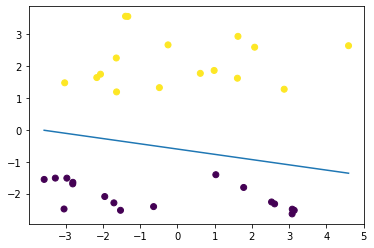

In [17]:
plt.scatter(
    simplest_features_test.x1,
    simplest_features_test.x2,
    c = simplest_label_test
)

# Graficamos nuestro umbral de clasificación

plt.plot(
    db_x,
    db_y
)

In [18]:
checkerboard = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/checkerboard.csv") # Importamos un nuevo conjunto de datos

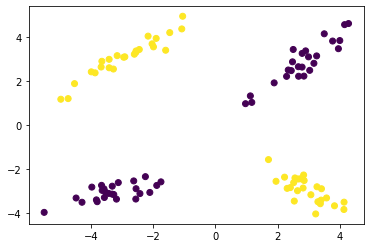

In [19]:
plt.scatter(
    checkerboard.x1,
    checkerboard.x2,
    c = checkerboard.y
)

In [20]:
checkerboard_features = checkerboard.iloc[:,:-1]

In [21]:
checkerboard_label = checkerboard.y

In [22]:
checkerboard_features_train, checkerboard_features_test, checkerboard_label_train, checkerboard_label_test = sklearn.model_selection.train_test_split(
    checkerboard_features,
    checkerboard_label,
    test_size=0.33,
    random_state=11
)

Entrenemos un nuevo perceptrón

In [23]:
p1 = sklearn.linear_model.Perceptron()
p1.fit(
    checkerboard_features_train,
    checkerboard_label_train
)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
print(sklearn.metrics.classification_report(
    checkerboard_label_test,
    p1.predict(checkerboard_features_test)
))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.56      0.67      0.61        15

    accuracy                           0.61        33
   macro avg       0.61      0.61      0.61        33
weighted avg       0.62      0.61      0.61        33



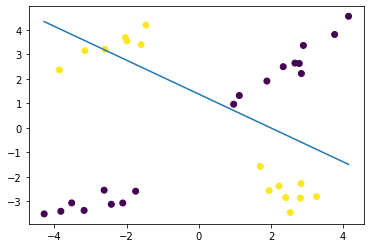

In [25]:
slope = -( p1.intercept_ / p1.coef_[0][1] ) / ( p1.intercept_ / p1.coef_[0][0] )  
intercept = -p1.intercept_ / p1.coef_[0][1]
db_x = np.array(
    [checkerboard_features_test.x1.min(),
    checkerboard_features_test.x1.max()]
)
db_y = slope * db_x + intercept
plt.scatter(
    checkerboard_features_test.x1,
    checkerboard_features_test.x2,
    c = checkerboard_label_test
)

plt.plot(
    db_x,
    db_y
)

## Actividad 1

¿El perceptrón es un buen método para esta tarea y por qué?. Sí sólo pudieses usar perceptrones, ¿cuál crees que sería un buen número a utilizar y cómo los ordenarías?, prográmalo y evalúa sus **resultados**.

Planifica tu arquitectura utilizando Tensorflow Playground

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.38047&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [26]:
# TODO: Código para perceptrones múltiples para clasificar el conjunto de datos checkerboard
# HINT: Documentación del perceptrón multicapa https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Implementa lo que aprendiste en TensorFlow Playground e implementalo acá.
mlp = sklearn.neural_network.MLPClassifier()

## Support Vector Machines

Ajustamos un modelo de SVM lineal sobre nuestros datos `checkerboard`

In [36]:
svm = sklearn.svm.SVC(
    kernel="linear" # utlizamos un kernel lineal
    ) # Instanciamos nuestra svm lineal
svm.fit(
    checkerboard_features_train,
    checkerboard_label_train
) # Ajustamos el perceptrón con los datos de entrenamiento

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
print(sklearn.metrics.classification_report(
    checkerboard_label_test,
    svm.predict(checkerboard_features_test)
))

              precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.60      1.00      0.75        15

    accuracy                           0.70        33
   macro avg       0.80      0.72      0.68        33
weighted avg       0.82      0.70      0.68        33



Utilizando una SVM lineal, el rendimiento es bajo, es similar a utilizar un único perceptrón.

In [34]:
# Funciones para mostrar los umbrales de SVM sobre nuestros datos

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Visualizamos cómo se ve el umbral de clasificación del SVM lineal.

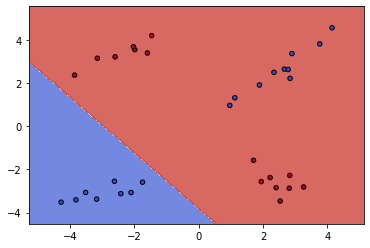

In [31]:
fig, ax = plt.subplots()
X0, X1 = checkerboard_features_test.x1, checkerboard_features_test.x2
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=checkerboard_label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

## Actividad 2

Utilice un kernel no lineal para entrenar otro modelo de SVM, calcule las métricas de clasificación asociadas a este nuevo modelo y visualice los umbrales de clasificación.

In [35]:
# Prográmame

# Actividad 3

Típicamente para comparar modelos se utiliza la validación cruzada para poder disminuir el sesgo de selección de datos. Utilice la función `sklearn.model_selection.cross_val_score()` para obtener el rendimiento promedio (debe seleccionar la métrica a comparar) de MLP y SVM sobre el conjunto de datos `iris` y evalúe qué método se desempeña mejor.

In [45]:
iris = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlfa/master/data/iris.csv")

In [46]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [47]:
iris_features = iris.iloc[:,:-1]
iris_label = iris.variety

In [37]:
# Prográmame